<a href="https://colab.research.google.com/github/stephanyresque/Ciencia-de-dados-2/blob/main/03_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("reshaping.xlsx")

df

,Estudante,Categoria,Semana,Tópico,Nota
0,Maria,Testes,1,1. Python,100
1,Maria,Projeto,1,1. Python,100
2,Maria,Testes,1,2. GitHub,70
3,Maria,Projeto,1,2. GitHub,70
4,Maria,Testes,2,3. Matplotlib,80
5,Maria,Projeto,2,3. Matplotlib,70
6,Maria,Testes,2,4. SQL,80
7,Maria,Projeto,2,4. SQL,70
8,Maria,Testes,3,5. NumPy,60
9,Maria,Projeto,3,5. NumPy,60


In [4]:
df_pivo = df.pivot(
    index = ['Estudante', 'Categoria'],
    columns = ['Tópico', 'Semana'],
    values = ['Nota']
)

In [5]:
df_pivo

Nota                                                 \
Tópico              1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO   
Semana                      1         1             2      2        3      3   
Estudante Categoria                                                            
João      Projeto          80        90            70     80       90     80   
          Testes          100        90            60     70       80     70   
Maria     Projeto         100        70            70     70       60     80   
          Testes          100        70            80     80       60     90   

                                              
Tópico              7. Pandas 8. Estatística  
Semana                      4              4  
Estudante Categoria                           
João      Projeto         100             90  
          Testes           70             80  
Maria     Projeto          70             80  
          Testes           70             80

In [6]:
#pivo table permite a agregação

In [7]:
df_table = df.pivot_table(
    index = ['Estudante'],
    columns = ['Semana', 'Tópico'],
    values = ['Nota']  #por padrão faz a média
)

In [8]:
df_table

Nota                                                           \
Semana            1                       2               3                4   
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João           90.0      90.0          65.0   75.0     85.0   75.0      85.0   
Maria         100.0      70.0          75.0   75.0     60.0   85.0      70.0   

                          
Semana                    
Tópico    8. Estatística  
Estudante                 
João                85.0  
Maria               80.0

In [10]:
df_table = df.pivot_table(
    index = ['Estudante'],
    columns = ['Semana', 'Tópico'],
    values = ['Nota'],
    aggfunc="count"
)

df_table

Nota                                                           \
Semana            1                       2               3                4   
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João              2         2             2      2        2      2         2   
Maria             2         2             2      2        2      2         2   

                          
Semana                    
Tópico    8. Estatística  
Estudante                 
João                   2  
Maria                  2

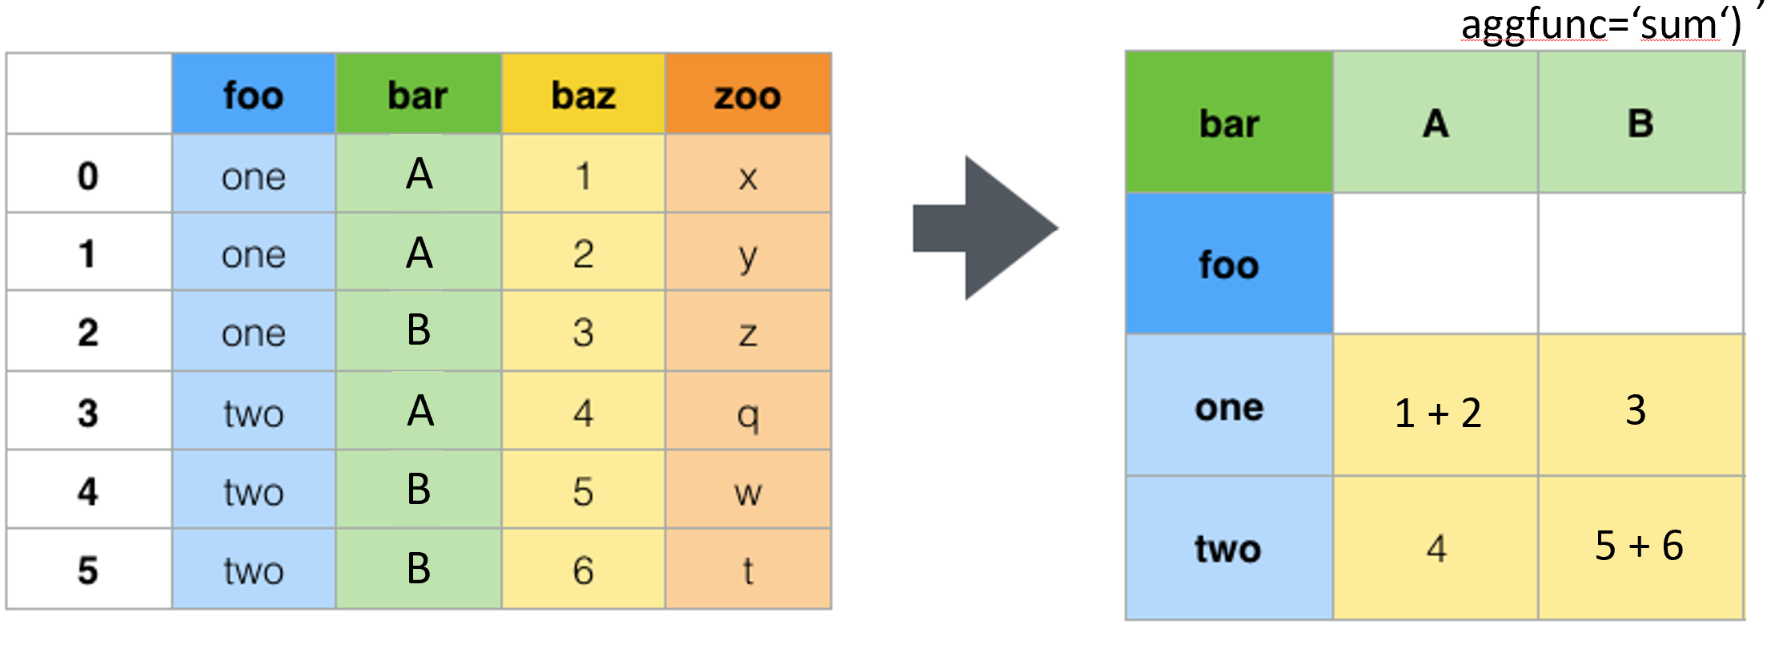

In [11]:
df.groupby(['Estudante', 'Semana', 'Tópico'])['Nota'].mean()

Estudante  Semana  Tópico        
João       1       1. Python          90.0
                   2. GitHub          90.0
           2       3. Matplotlib      65.0
                   4. SQL             75.0
           3       5. NumPy           85.0
                   6. POO             75.0
           4       7. Pandas          85.0
                   8. Estatística     85.0
Maria      1       1. Python         100.0
                   2. GitHub          70.0
           2       3. Matplotlib      75.0
                   4. SQL             75.0
           3       5. NumPy           60.0
                   6. POO             85.0
           4       7. Pandas          70.0
                   8. Estatística     80.0
Name: Nota, dtype: float64

In [12]:
df.groupby(['Estudante', 'Semana', 'Tópico'])['Nota'].mean().unstack(level = [1,2])


Semana            1                       2               3                4  \
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João           90.0      90.0          65.0   75.0     85.0   75.0      85.0   
Maria         100.0      70.0          75.0   75.0     60.0   85.0      70.0   

Semana                    
Tópico    8. Estatística  
Estudante                 
João                85.0  
Maria               80.0

# Gráficos com reshaping

In [13]:
bd = pd.read_csv('cereal_sem_negativos.csv')

bd.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [14]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     int64  
 10  potass    74 non-null     int64  
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.4+ KB


In [15]:
bd.groupby(['mfr', 'shelf']).count()

name  type  calories  protein  fat  sodium  fiber  carbo  sugars  \
mfr shelf                                                                     
A   2         1     1         1        1    1       1      1      1       1   
G   1         6     6         6        6    6       6      6      6       6   
    2         7     7         7        7    7       7      7      7       7   
    3         9     9         9        9    9       9      9      9       9   
K   1         4     4         4        4    4       4      4      4       4   
    2         7     7         7        7    7       7      7      7       7   
    3        12    12        12       12   12      12     12     12      12   
N   1         3     3         3        3    3       3      3      3       3   
    2         1     1         1        1    1       1      1      1       1   
    3         1     1         1        1    1       1      1      1       1   
P   1         2     2         2        2    2       2      2      2       2   
    2         1     1         1        1    1       1      1      1       1   
    3         6     6         6        6    6       6      6      6       6   
Q   2         3     3         3        3    3       3      3      3       3   
    3         4     4         4        4    4       4      4      4       4   
R   1         4     4         4        4    4       4      4      4       4   
    3         3     3         3        3    3       3      3      3       3   

           potass  vitamins  weight  cups  rating  
mfr shelf                                          
A   2           1         1       1     1       1  
G   1           6         6       6     6       6  
    2           7         7       7     7       7  
    3           9         9       9     9       9  
K   1           4         4       4     4       4  
    2           7         7       7     7       7  
    3          12        12      12    12      12  
N   1           3         3       3     3       3  
    2           1         1       1     1       1  
    3           1         1       1     1       1  
P   1           2         2       2     2       2  
    2           1         1       1     1       1  
    3           6         6       6     6       6  
Q   2           3         3       3     3       3  
    3           4         4       4     4       4  
R   1           4         4       4     4       4  
    3           3         3       3     3       3

In [16]:
bd.groupby(['mfr', 'shelf']).size()


mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         1
     3         1
P    1         2
     2         1
     3         6
Q    2         3
     3         4
R    1         4
     3         3
dtype: int64

<Axes: xlabel='mfr,shelf'>

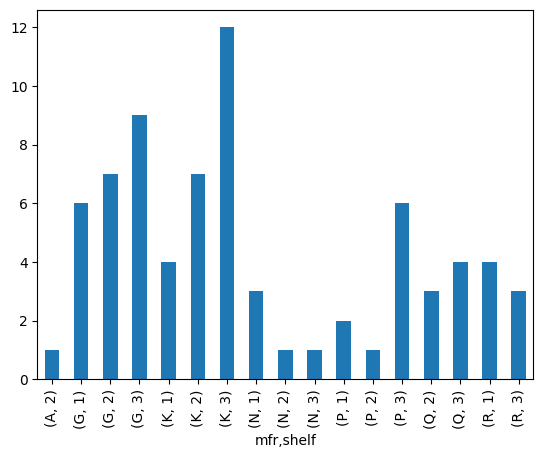

In [17]:
bd.groupby(['mfr', 'shelf']).size().plot(kind = 'bar')
#multi-índices geram esse efeito "poluído"

In [18]:
bd.groupby(['mfr', 'shelf']).size().unstack() #se eu não passar um level ele pega o último por padrão

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,1.0,1.0
P,2.0,1.0,6.0
Q,NaN,3.0,4.0
R,4.0,NaN,3.0


<Axes: xlabel='mfr'>

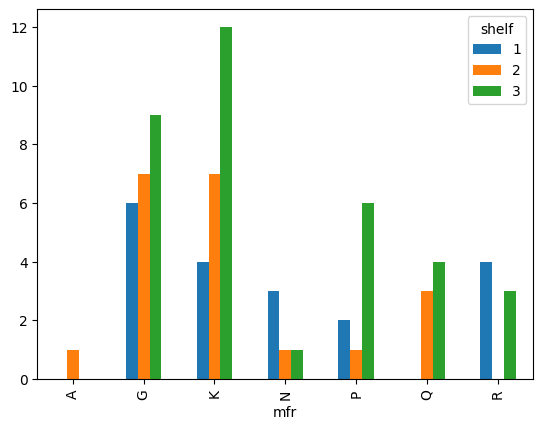

In [19]:
bd.groupby(['mfr', 'shelf']).size().unstack().plot(kind = 'bar')


<Axes: xlabel='mfr'>

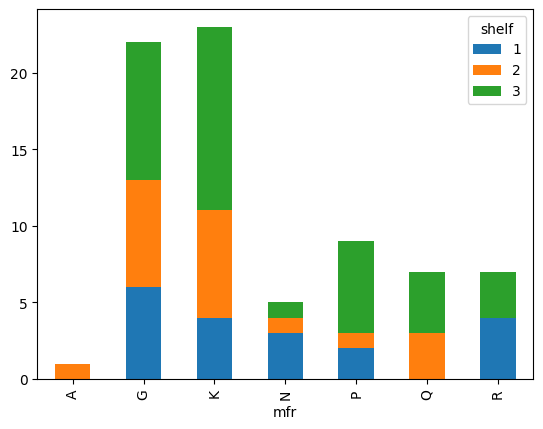

In [20]:
bd.groupby(['mfr', 'shelf']).size().unstack().plot(kind = 'bar', stacked = True)

In [22]:
bd.pivot_table(
    index = ['mfr'],
    columns = ['shelf'],
    aggfunc = 'size',
)

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,1.0,1.0
P,2.0,1.0,6.0
Q,NaN,3.0,4.0
R,4.0,NaN,3.0


<Axes: xlabel='mfr'>

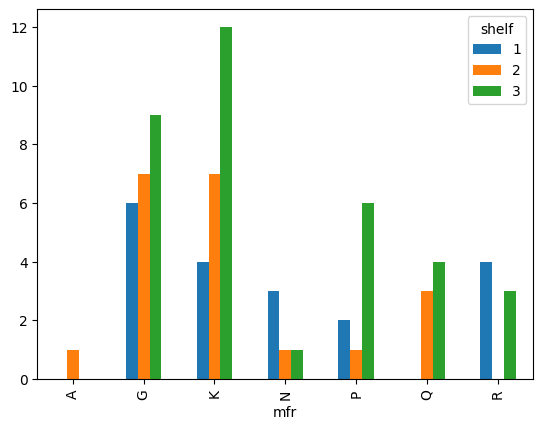

In [23]:
bd.pivot_table(
    index = ['mfr'],
    columns = ['shelf'],
    aggfunc = 'size',
).plot(kind = 'bar')